In [1]:
import re
from collections import Counter
import math
from matplotlib import pyplot as plt

In [2]:
with open("rmrb.txt", 'r') as f:
    corpus = f.read()

corpus = re.sub("[^\u4e00-\u9fa5]+", '', corpus) # 过滤非汉字内容
total_chars = len(corpus)
total_chars

4351194

In [3]:
char_count = Counter(corpus)
print(len(char_count))
char_count

4869


Counter({'习': 4938,
         '近': 7210,
         '平': 10190,
         '在': 31466,
         '中': 37543,
         '央': 3116,
         '政': 13467,
         '治': 8444,
         '局': 4169,
         '第': 5379,
         '二': 2873,
         '十': 3840,
         '一': 39465,
         '次': 5387,
         '集': 3931,
         '体': 13042,
         '学': 13098,
         '时': 15382,
         '强': 9362,
         '调': 4788,
         '贯': 1167,
         '彻': 1056,
         '落': 3404,
         '实': 16233,
         '好': 10210,
         '新': 19944,
         '代': 6999,
         '党': 10401,
         '的': 107165,
         '组': 6126,
         '织': 4044,
         '路': 5484,
         '线': 5155,
         '不': 23202,
         '断': 3262,
         '把': 4278,
         '建': 14366,
         '设': 9225,
         '得': 7520,
         '更': 8584,
         '加': 11113,
         '坚': 7049,
         '有': 25493,
         '力': 16189,
         '是': 24767,
         '重': 12441,
         '要': 18521,
         '基': 8261,
         '础': 2120

In [4]:
total_chars = len(corpus)
entropy = 0

# 计算每个汉字的概率和熵
for char, count in char_count.items():
    probability = count / total_chars
    entropy -= probability * math.log2(probability)

print("汉字熵:", entropy)

汉字熵: 9.676087372170182


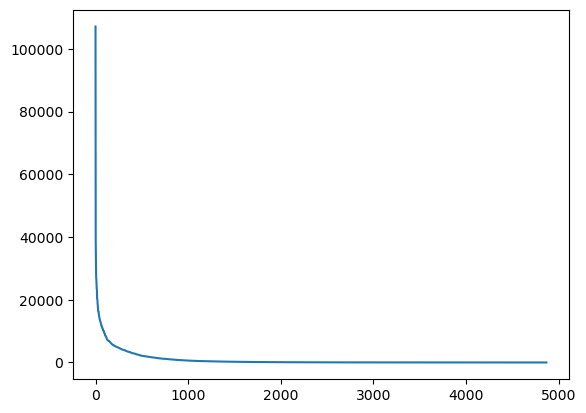

In [5]:
sorted_char_count = dict(sorted(char_count.items(), key=lambda x: x[1], reverse=True))
char_freq = [i for _, i in sorted_char_count.items()]

plt.plot(char_freq)
plt.show()

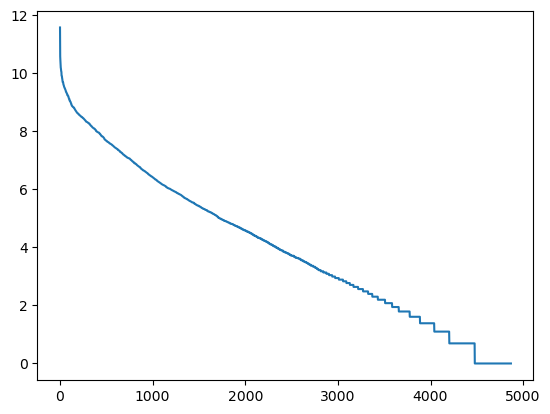

In [6]:
char_freq_log = [math.log(i) for i in char_freq]
plt.plot(char_freq_log)
plt.show()